<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/m2l_wa_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing dependencies
This workshop will use three libraries from the Loop project
1. LoopStructural - https://github.com/Loop3D/LoopStructural
2. map2loop - https://github.com/Loop3D/map2loop-2
3. LoopFlow - https://github.com/Loop3D/LoopFlow

The following code blocks will install the required dependencies for the Loop libraries into this colab environment. Alternatively, the workshop can be run using the docker image.

## map2loop + LoopStructural

In [1]:
!pip install rasterio
!pip install git+https://github.com/geopandas/geopandas.git@v0.10.2
!pip install hjson
!pip install owslib
!pip install git+https://github.com/Loop3D/map2model_cpp.git
!pip install git+https://github.com/Loop3D/LoopProjectFile.git
!pip install pygeos
!pip install mplstereonet
!pip install lavavu-osmesa
!pip install LoopStructural
!pip install git+https://github.com/Loop3D/map2loop-2.git
!pip install beartype
!pip install ipyvolume
!pip install git+https://github.com/Loop3D/LoopFlow.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/geopandas/geopandas.git (to revision v0.10.2) to /tmp/pip-req-build-_6oniou8
  Running command git clone -q https://github.com/geopandas/geopandas.git /tmp/pip-req-build-_6oniou8
  Running command git checkout -q a65bda0a1ec25b99b02398865fd299852f7bac46
     |████████████████████████████████| 16.7 MB 347 kB/s 
     |████████████████████████████████| 6.3 MB 15.0 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2-py2.py3-none-any.whl size=1031401 sha256=0d40046db0f57e8f13375cabff84184253ae90c765b1239b35c0f028ae38e8f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-xp402x47/wheels/94/28/9a/9eda645186d70ed0e1f27e35dbdde148cd08692a9a886346a5
Successfully built geopandas
Looking in indexes: https:/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 57 kB 6.1 MB/s 
     |████████████████████████████████| 432 kB 57.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-fmm: filename=scikit_fmm-2022.3.26-cp37-cp37m-linux_x86_64.whl size=221462 sha256=c98cf660605eecc35762275daa33c272ef09eee48d10e854a3a0472f0b4a2c80
  Stored in directory: /root/.cache/pip/wheels/38/3f/06/ea7ad6a1acf5d919871252b111f6dd2b709b76b6a8e941dff3
Successfully built scikit-fmm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3D/map2loop-2.git to /tmp/pip-req-build-0i1cpx0k
  Running command git clone -q https://github.com/Loop3D/map2loop-2.git /tmp/pip-req-build-0i1cpx0k
  Created wh

In [2]:
bbox_3d = {
     'minx': 509727.48772433,
     'miny': 7491991.14850445,
     'maxx': 522116.39294858,
     'maxy': 7500358.30361626,
     'base': -4800,
     'top': 1200}

In [3]:
import os
import hjson
from map2loop.m2l_enums import VerboseLevel
from map2loop.project import Project
from math import sqrt

out_dir='./new_model'


proj = Project( 
                 loopdata_state = "WA",
            project_path=out_dir,
    project_crs='EPSG:28350',
    verbose_level=VerboseLevel.NONE,
    working_projection='EPSG:28350',
                )

proj.update_config(
                    out_dir=out_dir,
                    bbox_3d=bbox_3d,
                    project_crs='EPSG:28350',
                    # overwrite='true',
                    # run_flags={'fault_dip':-999},
                    # quiet='None',
    
#                     loopFilename='test.loop3d'
                  )


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.


Warnings:
   -> 17 NaN/blank found in column "supersuite" of geology file, replacing with 0


The warnings listed above were issued checking the GEOLOGY map



Warnings:
   -> No fault dip estimate text for fault polylines
   -> 9 NaN/blank found in column "dip_dir" of fault file, replacing with -999
   -> 9 NaN/blank found in column "dip_est" of fault file, replacing with -999


The warnings listed above were issued checking the FAULT map


In [4]:
proj.run()

100%|██████████| 100/100 [00:09<00:00, 10.94it/s]


In [5]:
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

In [6]:
f=open(proj.config.tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()

In [7]:
from LoopStructural import GeologicalModel
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
                'step':10,
                'fault_buffer':0.2,
#                 'force_mesh_geometry':True,
#                 'solver':'pyamg',
#                 overprints:overprints,
#                 'cpw':1,
#                 'gpw':5,
               }
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':5e4,  # how many tetras/voxels
                    'buffer':2.,  # how much to extend nterpolation around box
#                     'solver':'pyamg',
#                     'damp':True
                    # 'npw':0,
                    # 'regularisation':0.5
                   }


model, m2l_data = GeologicalModel.from_map2loop_directory(proj.config.project_path,
                                                              evaluate=False,
                                                          fault_params=fault_params,
                                                          rescale=False,
#                                                           vectorscale=1,
                                                          foliation_params=foliation_params)

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.WARNING: 2022-08-12 07:40:52,045: _fault_builder.py:194 -- Rescaling fault norm constraint length for fault frame


In [8]:
model.update()

  0%|          | 0/13 [00:00<?, ?it/s]

In [9]:
from LoopStructural.visualisation import LavaVuModelViewer

In [10]:
view = LavaVuModelViewer(model)
view.add_model_surfaces()
view.interactive()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]


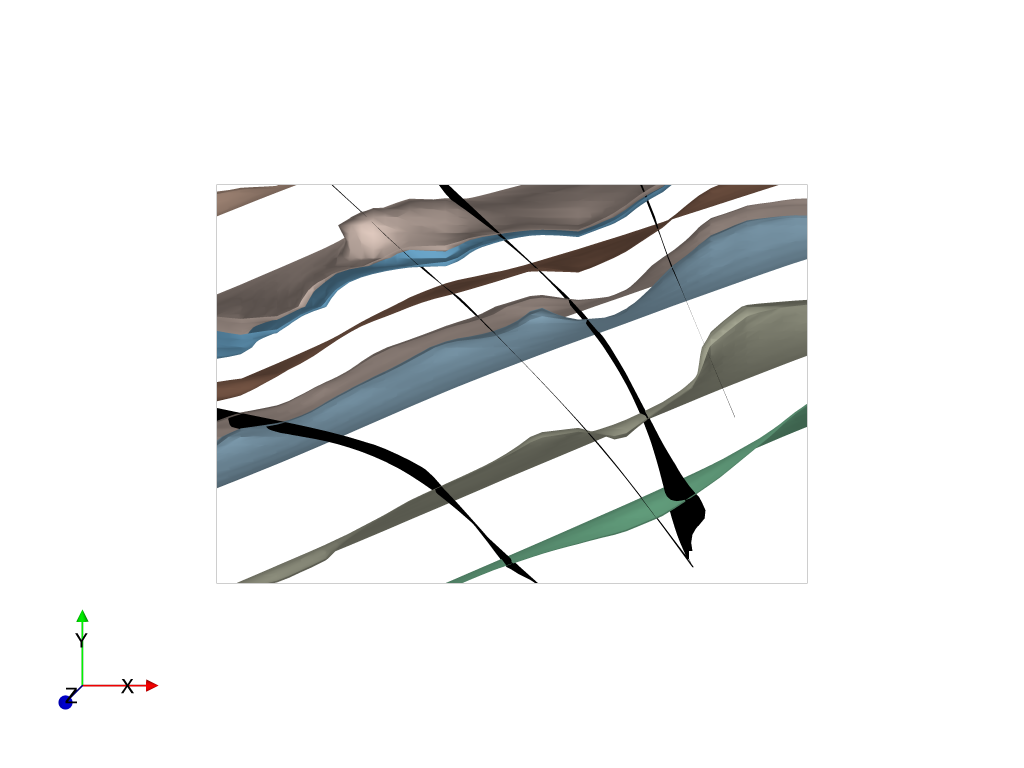

In [11]:
view.display()

##Code to calculate voxel-level spatial relationship graph and flow proxies

In [12]:
from LoopFlow import import_triangulation as it
from LoopFlow import calculate_flow as cf



bbox=it.create_bbox(minx,miny,maxx,maxy,model_base,model_top)
destination=out_dir

In [13]:
voxel_size=250


Graw,df_nodes_raw,df_edges_raw,lengths=cf.graph_from_model(model,voxel_size,bbox,destination)


nnx,nny,nnz 49 33 24
Running topological_analysis version 0.1.15
12-Aug-2022 (07:42:11) - GRAPH CALCULATED


##Assign weights according to feature (fault, strat contact, interior of unit etc.) and specific fast stratigraphic units

In [14]:
faults_only=False
                    
scenario={     #free-form scenario   
        'fault_node':1000.0,
        'geological_formation_slow':1000.0,
        'geological_formation_fast':1.0,
        'interformation_node':1000.0,

        'fault_formation':1000.0,
        'same_fault':1000.0,
        'fault_fault':1000.0,
        'interform_fault':1000.0,
        'interform_formation':100.0,
        'interform_interform':100.0,
        'same_interform':100.0,

        'fast_formation_code':['0']
        }
scenario='fast_faults' #pre-defined scenario
                        # fast_faults    
                        # fast_strat_contacts 
                        # fast_both  
                        # fault_barriers_not_paths  
                        # fault_barriers_but_paths_and_fast_strat
                        #homogeneous

source='point' # 'west','north', 'south', top', 'base', 'deep_line', 'point'
target='no' # 'west','north', 'south', top', 'base', 'deep_line', 'point'
fast_formation_code=['3']

ptx=(bbox.loc[0].minx+bbox.loc[0].maxx)/2
pty=(bbox.loc[0].miny+bbox.loc[0].maxy)/2
ptz=bbox.loc[0].lower

f=open(destination+'/parameters.txt','w')
f.write('faults_only = {}\nscenario = {}\nsource = {}\nfast_litho = {}\npoint = {},{},{}\n'.format(faults_only,str(scenario),source,fast_formation_code,ptx,pty,ptz))
f.close()

range=voxel_size/2
length_scale_max=sqrt(lengths[0]**2+lengths[1]**2+lengths[2]**2)
G,scenario=cf.assign_weights(Graw,scenario,source,target,fast_formation_code,faults_only,bbox,ptx,pty,ptz,range,length_scale_max)

voxet_df,distance,path=cf.calculate_dist(G,df_nodes_raw,voxel_size,bbox,scenario,destination)
cf.calculate_paths(path,df_nodes_raw,scenario,destination)

12-Aug-2022 (07:42:26) - POINT SOURCE ADDED
12-Aug-2022 (07:42:26) - no NODE ADDED
12-Aug-2022 (07:42:26) - WEIGHTS ASSIGNED
source= -1
12-Aug-2022 (07:42:44) - DISTS CALCULATED
12-Aug-2022 (07:42:44) - PATHS CALCULATED


In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import ipyvolume as ipv
LoadPath = out_dir




In [16]:
df_path = pd.read_csv(LoadPath+'/'+scenario+"_path_count.csv")
df_dist = pd.read_csv(LoadPath+'/'+scenario+"_dist_voxet.csv")


df_dist['color']=256*np.sqrt(df_dist['dist'])/np.sqrt(df_dist['dist'].max())
df_dist['color']=df_dist['color'].astype('int')


In [17]:
x_lim = [df_path.X.min(), df_path.X.values.max()]
y_lim = [df_path.Y.min(), df_path.Y.values.max()]
z_lim = [df_path.Z.min(), df_path.Z.values.max()]
xyz_lim = [np.min([x_lim, y_lim, z_lim]), np.max([x_lim, y_lim, z_lim])]


x_ratio=1.0
y_ratio=(y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])
z_ratio=(z_lim[1]-y_lim[0])/(z_lim[1]-x_lim[0])
x_ratio,y_ratio,z_ratio

x_ratio=1.0
y_ratio=(bbox_3d['maxy']-bbox_3d['miny'])/(bbox_3d['maxx']-bbox_3d['minx'])
y_ratio=(bbox_3d['top']-bbox_3d['base'])/(bbox_3d['maxx']-bbox_3d['minx'])
x_ratio,y_ratio,z_ratio

y_range=(bbox_3d['maxy']-bbox_3d['miny'])*y_ratio
z_range=(bbox_3d['top']-bbox_3d['base'])*z_ratio/5

##Display distance from defined source location based on flow weights of specific geological elements

In [18]:
import matplotlib.cm
from google.colab import output
output.enable_custom_widget_manager()

cmap = plt.get_cmap("gnuplot")
c = df_dist.color
colors = cmap(c)


size = 700
fig = ipv.figure(width=size, height=size)
#df_path_cut=df_path[df_path['count']>100]
scatter = ipv.scatter(df_dist.X.values, df_dist.Y.values, df_dist.Z.values, 
                      color=colors, size=3, marker="box" ) # ‘arrow’, ‘box’, ‘diamond’, ‘sphere’, ‘point_2d’,‘square_2d’, ‘triangle_2d’, 

ipv.xlim(x_lim[0], x_lim[1])
ipv.ylim(y_lim[0]-y_range, y_lim[1]+y_range)
ipv.zlim(z_lim[0]-z_range, z_lim[1]+z_range)
ipv.show()

##Display most used pathways from defined source location based on flow weights of specific  geological elements

In [19]:
import matplotlib.cm
from google.colab import output
output.enable_custom_widget_manager()

path_cutoff=10
df_path_cut=df_path[df_path['count']>path_cutoff].copy(deep=True)
df_path_cut['color']=256*(np.log(df_path_cut['count']-path_cutoff))/(np.log(df_path_cut['count'].max()-path_cutoff))
df_path_cut['color']=df_path_cut['color'].astype('int')


cmap = plt.get_cmap("gnuplot")
c = df_path_cut.color
colors = cmap(c)


size = 700
fig = ipv.figure(width=size, height=size)
scatter = ipv.scatter(df_path_cut.X.values, df_path_cut.Y.values, df_path_cut.Z.values, 
                      color=colors, size=1, marker="box") # ‘arrow’, ‘box’, ‘diamond’, ‘sphere’, ‘point_2d’,‘square_2d’, ‘triangle_2d’, 

ipv.xlim(x_lim[0], x_lim[1])
ipv.ylim(y_lim[0]-y_range, y_lim[1]+y_range)
ipv.zlim(z_lim[0]-z_range, z_lim[1]+z_range)

ipv.show()
